In [1]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm

In [2]:
RISKY_ASSET = 'AMZN'
MARKET_BENCHMARK = '^GSPC'
START_DATE = '2019-03-01'
END_DATE = '2022-03-01'

In [3]:
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True,
                 progress=False)

In [4]:
df.head()

Adj Close                     Close                      High  \
                   AMZN        ^GSPC         AMZN        ^GSPC         AMZN   
Date                                                                          
2019-03-01  1671.729980  2803.689941  1671.729980  2803.689941  1674.260010   
2019-03-04  1696.170044  2792.810059  1696.170044  2792.810059  1709.430054   
2019-03-05  1692.430054  2789.649902  1692.430054  2789.649902  1707.800049   
2019-03-06  1668.949951  2771.449951  1668.949951  2771.449951  1697.750000   
2019-03-07  1625.949951  2748.929932  1625.949951  2748.929932  1669.750000   

                                 Low                      Open               \
                  ^GSPC         AMZN        ^GSPC         AMZN        ^GSPC   
Date                                                                          
2019-03-01  2808.020020  1651.000000  2787.379883  1655.130005  2798.219971   
2019-03-04  2816.879883  1674.359985  2767.659912  1685.000000  2814.370117   
2019-03-05  2796.439941  1689.010010  2782.969971  1702.949951  2794.409912   
2019-03-06  2790.270020  1668.280029  2768.689941  1695.969971  2790.270020   
2019-03-07  2767.250000  1620.510010  2739.090088  1667.369995  2766.530029   

             Volume              
               AMZN       ^GSPC  
Date                             
2019-03-01  4974900  3972280000  
2019-03-04  6167400  3919810000  
2019-03-05  3681500  3585690000  
2019-03-06  3996000  3786600000  
2019-03-07  4957000  3904860000

In [5]:
X= df['Adj Close'].rename(columns={RISKY_ASSET: 'asset',
                                  MARKET_BENCHMARK: 'market'}) \
.resample('M') \
.last() \
.pct_change() \
.dropna()

In [6]:
X.head()

,asset,market
Date,,
2019-04-30,0.081859,0.039313
2019-05-31,-0.078613,-0.065778
2019-06-30,0.066792,0.068930
2019-07-31,-0.014179,0.013128
2019-08-31,-0.048474,-0.018092


In [7]:
import matplotlib.pyplot as plt

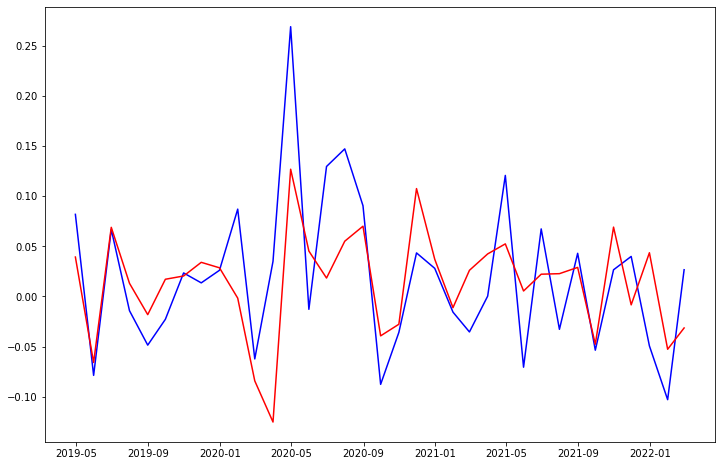

In [8]:
plt.figure(figsize=(12,8))
plt.plot(X.index,X.asset,'b',X.index,X.market,'r')
plt.show()

In [9]:
import pandas_datareader as wb
from matplotlib.dates import MonthLocator, DateFormatter

In [10]:
from mlxtend.plotting import scatterplotmatrix

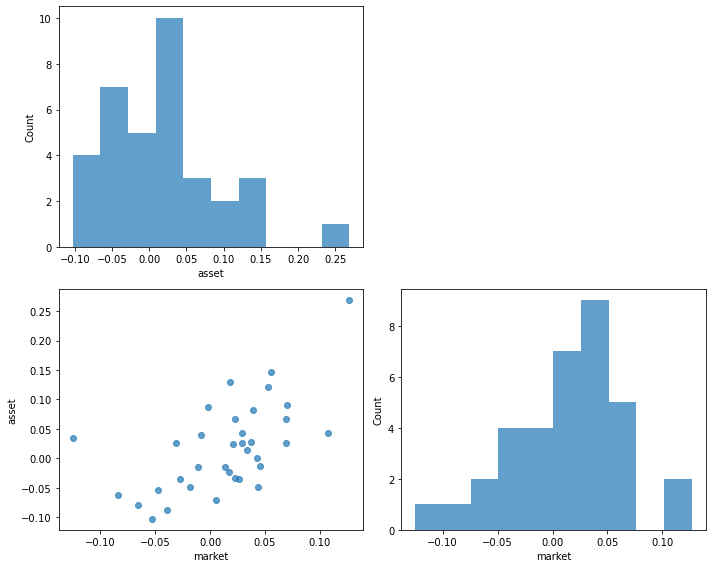

In [11]:
cols = ["asset", "market",]
scatterplotmatrix(X[cols].values, figsize=(10,8),
                 names = cols, alpha = 0.7)
plt.tight_layout()
plt.show()

In [12]:
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance

In [13]:
print(beta)

0.8845037253100757


In [14]:
y = X.pop('asset')
X = sm.add_constant(X)
capm_model = sm.OLS(y, X).fit()
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  asset   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     18.31
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           0.000151
Time:                        18:44:56   Log-Likelihood:                 48.384
No. Observations:                  35   AIC:                            -92.77
Df Residuals:                      33   BIC:                            -89.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0062      0.011      0.567      0.5

C:\Users\ALEJANDRO VARGAS\AnacondaPy\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
